In [1]:
#Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing Dataset
train = pd.read_csv('House_Price_Prediction_Dataset/train.csv')
test = pd.read_csv('House_Price_Prediction_Dataset/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train['SalePrice'].describe() #high-diff between 75% and max is huge ,this might be outlier

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

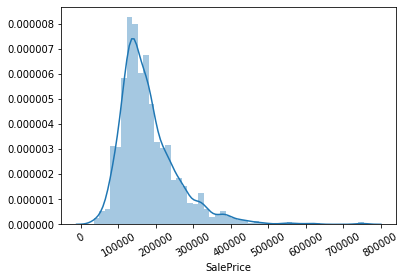

In [6]:
#Visualize SalePrice Column
import seaborn as sns
sns.distplot(train['SalePrice'])
plt.xticks(rotation=30)

#### Here we can see that due to some high sale price, our data does not seem to be centered around any value. This means that the sale prices are not symmetrical about any value

In [7]:
#check skewness
print('Skewness = ',train['SalePrice'].skew())

Skewness =  1.8828757597682129


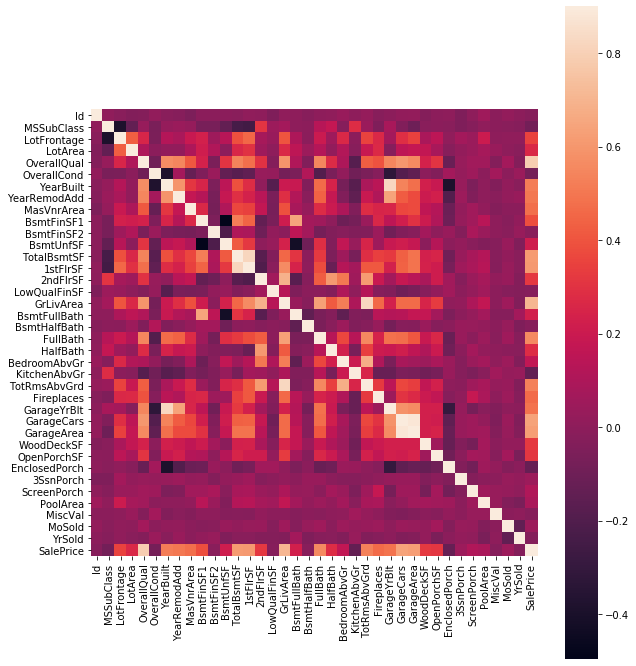

In [8]:
# correlation
corr = train.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

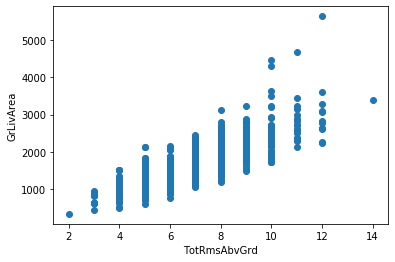

In [9]:
#TtRmsAbvGrd and GrLivArea
plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.show();

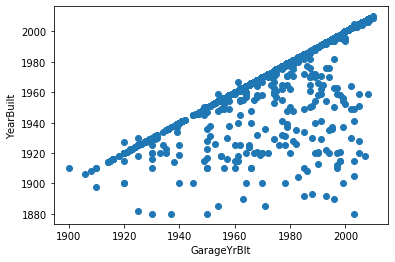

In [10]:
# GarageYrBlt and YearBuilt
plt.scatter(x=train['GarageYrBlt'], y=train['YearBuilt'])
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')
plt.show();

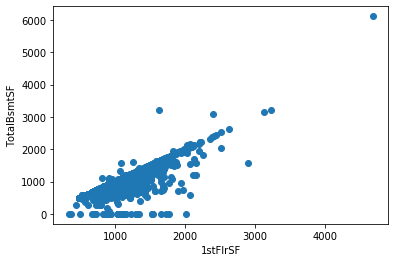

In [11]:
# 1stFlrSF and TotalBsmtSF
plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')
plt.show();

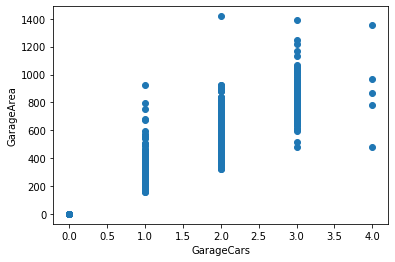

In [12]:
# GarageCars and SalePrice
plt.scatter(x=train['GarageCars'], y=train['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.show();

In [13]:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:] # saved top feature fro future reference
corr_top

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

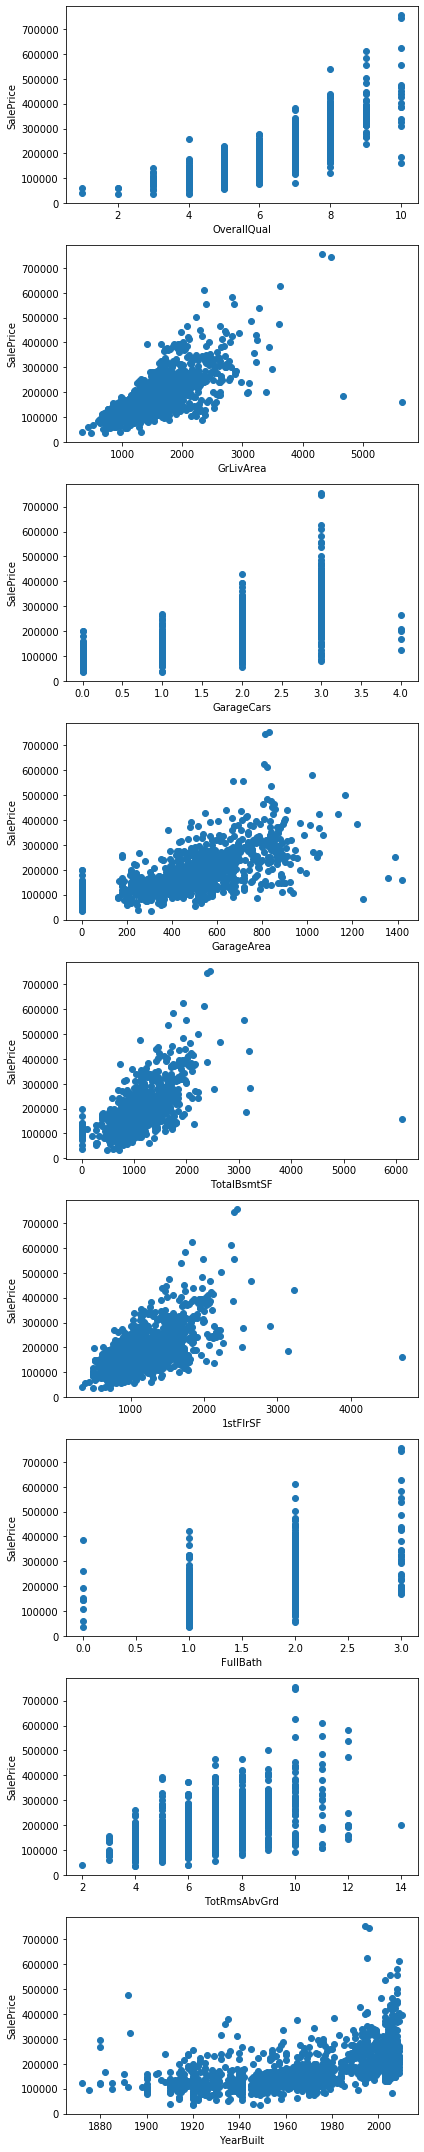

In [14]:
# Top features and SalePrice
numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']
fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))

for i in range(len(top_features)):    
    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show();

## Performing Data Preprocessing

In [15]:
#Handling Outliers

Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []

for i in top_features:
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off

    # save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]

    # append values for DataFrame

    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue
df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)

,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [16]:
train.shape

(1327, 81)

## Feature transformation
#### concatenate the train and test dataframes into a single dataframe which will make easier to manipulate the data

In [17]:
#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = np.log(train['SalePrice'])

#drop Id and SalePrice from train dataframe
train.drop(['Id','SalePrice'],inplace=True,axis=1)

#store test Id
test_id = test['Id']

#drop test Id
test.drop(['Id'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])

(array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5]),
 <a list of 8 Text xticklabel objects>)

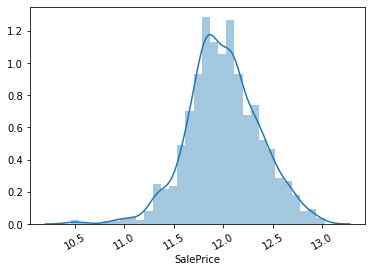

In [18]:
#Visualize log transformation affected our target feature
import seaborn as sns
sns.distplot(target)
plt.xticks(rotation=30)

## Handling Missing Value

In [19]:
#Null values
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [20]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [21]:
#                                                Ordinal features
#NA means no Pool
train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fence
train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)

# NA means no fireplace
train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)


#                                                 Nominal features
# NA means no miscellaneous feature
train['MiscFeature'].fillna('None',inplace=True)

# NA means no alley access
train['Alley'].fillna('None',inplace=True)

#                                               Numerical features
# Replace null lotfrontage with average of the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

## Preparing Data for Prediction

## Linear Regression Model

In [23]:
#                                                Ordinal features

#NA means no Pool

train['PoolQC'].replace(['Ex','Gd','TA','Fa',np.nan],[4,3,2,1,0],inplace=True)



# NA means no fence

train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw',np.nan],[4,3,2,1,0],inplace=True)



# NA means no fireplace

train['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po',np.nan],[5,4,3,2,1,0],inplace=True)



#                                                 Nominal features

# NA means no miscellaneous feature

train['MiscFeature'].fillna('None',inplace=True)



# NA means no alley access

train['Alley'].fillna('None',inplace=True)



#                                               Numerical features

# Replace null lotfrontage with average of the neighborhood

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'